In [1]:
import pandas as pd
import os
import ast
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime


In [2]:
# "dataset_combined" klasörüne git
folder_path = "/Users/eyupburakatahanli/Desktop/Tubitak_Air_pol/dataset_combined"
os.chdir(folder_path)
dfs = {}
# tüm CSV dosyalarını al ve oku
for filename in os.listdir():
    if filename.endswith(".csv"):
        # dosya adından DataFrame adını ve dosya adını çıkart
        df_name = filename.split(".")[0].replace(" ", "")
        df = pd.read_csv(filename)
        exec(df_name + " = pd.DataFrame(df)") # DataFrame'i kaydet
        dfs[df_name] = df

/var/folders/fd/qxb5q9_90ds63d5jvf0jqgsr0000gn/T/ipykernel_13872/59790196.py:10: DtypeWarning: Columns (14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename)
/var/folders/fd/qxb5q9_90ds63d5jvf0jqgsr0000gn/T/ipykernel_13872/59790196.py:10: DtypeWarning: Columns (14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename)
/var/folders/fd/qxb5q9_90ds63d5jvf0jqgsr0000gn/T/ipykernel_13872/59790196.py:10: DtypeWarning: Columns (14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename)
/var/folders/fd/qxb5q9_90ds63d5jvf0jqgsr0000gn/T/ipykernel_13872/59790196.py:10: DtypeWarning: Columns (14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename)
/var/folders/fd/qxb5q9_90ds63d5jvf0jqgsr0000gn/T/ipykernel_13872/59790196.py:10: DtypeWarning: Columns (14,15,16) have mixed types. 

In [3]:
#ReadTime sütunu  datetime a dönüştürme ve ay yıl ve gün bilgisini df e ekleme
for district, df in dfs.items():
    dfs[district]['ReadTime'] = pd.to_datetime(dfs[district]['ReadTime'], format='%Y-%m-%dT%H:%M:%S')
    dfs[district]["Year"] = dfs[district]["ReadTime"].dt.year
    dfs[district]["Day"] = dfs[district]["ReadTime"].dt.day
    dfs[district]["Month "] = dfs[district]["ReadTime"].dt.month
    #sonraki çalışmalarda 2023 yılına ait bir değişken olduğunu farkettik bunu siliyoruz
    dfs[district].drop(dfs[district][dfs[district]['Year'] == 2023].index,inplace=True)
    #aqı endex değeri nan olan tüm değişkenleri siliyoruz
    dfs[district] = dfs[district].dropna(subset=['AQIINDEX_AQI'])

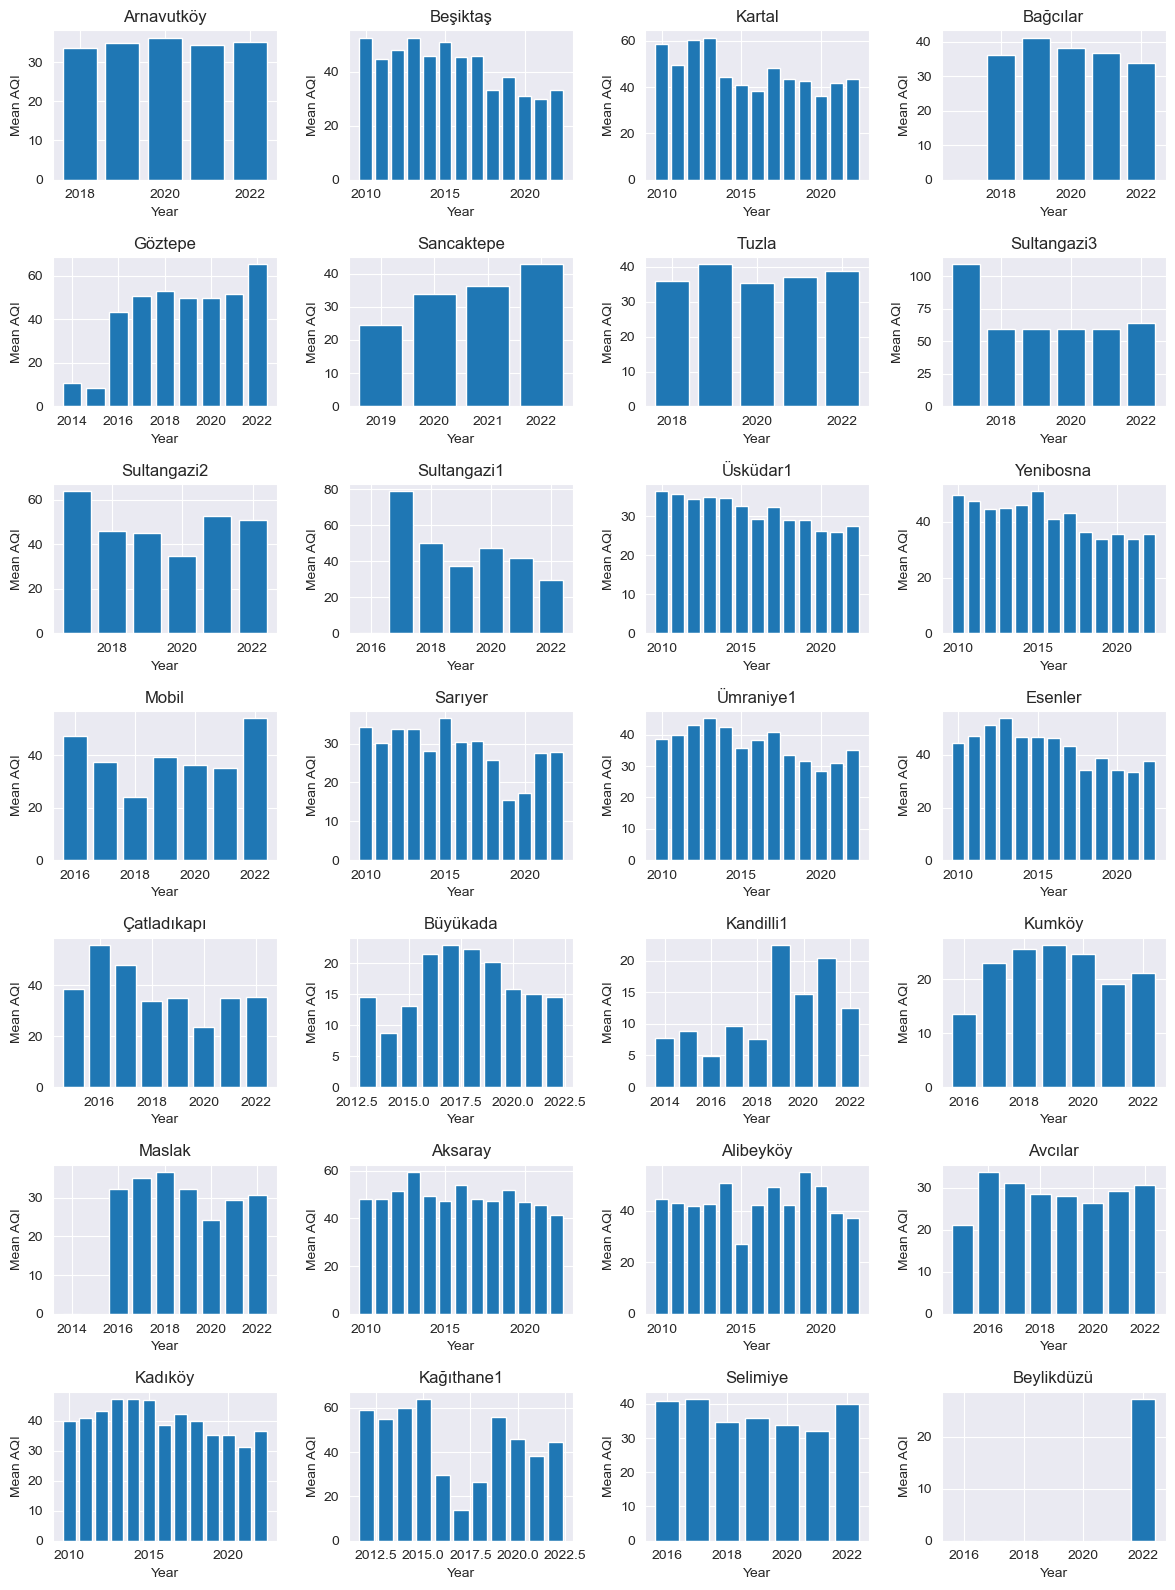

In [4]:
# Grafiklerin çizimi için bir altplot oluşturun
fig, axs = plt.subplots(7, 4, figsize=(12, 16))

# Döngü sayacı
count = 0

# Her bir veri çerçevesini grafikleştirin
for district, df in dfs.items():
    # Year sütununu datetime olarak dönüştür
    #df['Readtime'] = pd.to_datetime(df['Readtime'], format='%Y-%m-%d %H:%M:%S')

    # AQI değeri NaN olan satırları sil
    #df = df.dropna(subset=['AQI'])

    # Year sütununa göre AQI değerlerinin ortalamasını hesapla
    mean_aqi = dfs[district].groupby('Year')["AQIINDEX_AQI"].mean()

    # Grafik çizimi
    axs[count // 4, count % 4].bar(mean_aqi.index, mean_aqi)
    axs[count // 4, count % 4].set_xlabel('Year')
    axs[count // 4, count % 4].set_ylabel('Mean AQI')
    axs[count // 4, count % 4].set_title(district)

    # Sayaçı artır
    count += 1

# Grafikleri düzenle
plt.tight_layout()

# Grafikleri göster
plt.show()


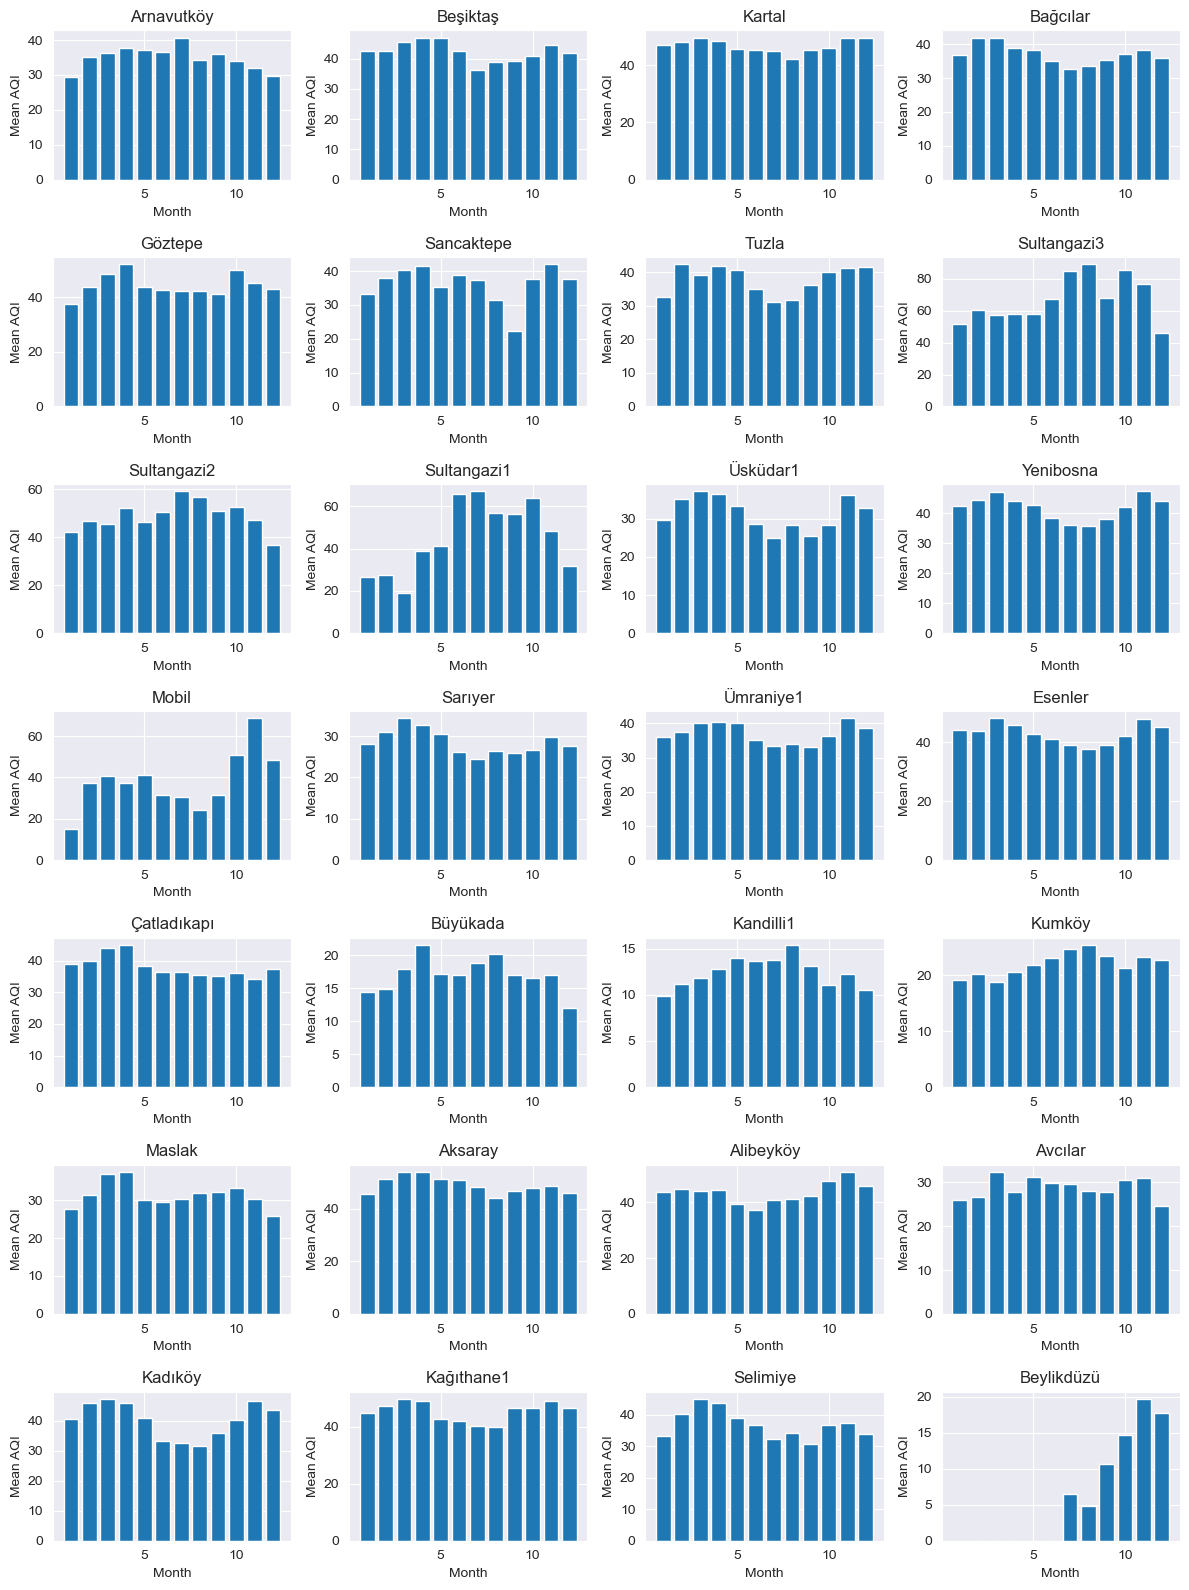

In [5]:
# Grafiklerin çizimi için bir altplot oluşturun
fig, axs = plt.subplots(7, 4, figsize=(12, 16))

# Döngü sayacı
count = 0

# Her bir veri çerçevesini grafikleştirin
for district, df in dfs.items():
    # Year sütununa göre AQI değerlerinin ortalamasını hesapla
    mean_aqi = dfs[district].groupby('Month ')["AQIINDEX_AQI"].mean()

    # Grafik çizimi
    axs[count // 4, count % 4].bar(mean_aqi.index, mean_aqi)
    axs[count // 4, count % 4].set_xlabel('Month')
    axs[count // 4, count % 4].set_ylabel('Mean AQI')
    axs[count // 4, count % 4].set_title(district)

    # Sayaçı artır
    count += 1

# Grafikleri düzenle
plt.tight_layout()

# Grafikleri göster
plt.show()


In [6]:
seasons = {
    1: "Winter",
    2: "Winter",
    3: "Spring",
    4: "Spring",
    5: "Spring",
    6: "Summer",
    7: "Summer",
    8: "Summer",
    9: "Autumn",
    10: "Autumn",
    11: "Autumn",
    12: "Winter"
}

In [7]:
def categorize_hour(hour):
    if hour < 8:
        return 'Night'
    elif hour < 16:
        return 'Day'
    else:
        return 'Evening'

In [8]:
for district, df in dfs.items():
    #format dönüşümü
    dfs[district]['ReadTime'] = pd.to_datetime(dfs[district]['ReadTime'], format='%Y-%m-%dT%H:%M:%S')
    #gün ay yıl- olarak ayı değişkenlere atanması
    dfs[district]["Year"] = dfs[district]["ReadTime"].dt.year
    dfs[district]["Day"] = dfs[district]["ReadTime"].dt.day
    dfs[district]["Month"] = dfs[district]["ReadTime"].dt.month
    #saat değişkeni ve buna uygun kategorinin eklenmesi
    dfs[district]["Hour"] = dfs[district]["ReadTime"].dt.hour
    dfs[district]['HourCategory'] = dfs[district]['Hour'].apply(categorize_hour)
    #Mevsim değişkeni ve kategorisinin eklenmesi
    dfs[district]['Season'] = dfs[district]['ReadTime'].dt.month.map(seasons)

    #aqı endex değeri nan olan tüm değişkenleri siliyoruz
    dfs[district] = dfs[district].dropna(subset=['AQIINDEX_AQI'])

    #sonraki çalışmalarda 2023 yılına ait bir değişken olduğunu farkettik bunu siliyoruz
    dfs[district].drop(dfs[district][dfs[district]['Year'] == 2023].index,inplace=True)

In [9]:
def ortalama_2022(df):
    filtreli_veri = df[df['Year'] == 2022]
    filtreli_ortalama = filtreli_veri['AQIINDEX_AQI'].mean()
    return filtreli_ortalama


In [10]:
def mevsimler_ortalama(df):
    filtreli_veri = df[df['Season'] == "Winter"]
    df_winter_mean = filtreli_ortalama = filtreli_veri['AQIINDEX_AQI'].mean()

    filtreli_veri = df[df['Season'] == "Summer"]
    df_summer_mean = filtreli_ortalama = filtreli_veri['AQIINDEX_AQI'].mean()

    filtreli_veri = df[df['Season'] == "Autumn"]
    df_autumn_mean = filtreli_ortalama = filtreli_veri['AQIINDEX_AQI'].mean()

    filtreli_veri = df[df['Season'] == "Spring"]
    df_spring_mean = filtreli_ortalama = filtreli_veri['AQIINDEX_AQI'].mean()


    print("Kış ayları ortalama AQI:",df_winter_mean, "ilkbahar ayı ortalama AQI", df_spring_mean , "yaz ayı ortalama AQI", df_summer_mean,
          "sonbahar ayı ortalama AQI", df_autumn_mean )


In [11]:
mevsimler_ortalama(dfs["Ümraniye1"])

Kış ayları ortalama AQI: 37.451918606730324 ilkbahar ayı ortalama AQI 40.305695847362514 yaz ayı ortalama AQI 34.17072386058981 sonbahar ayı ortalama AQI 36.99111729452055


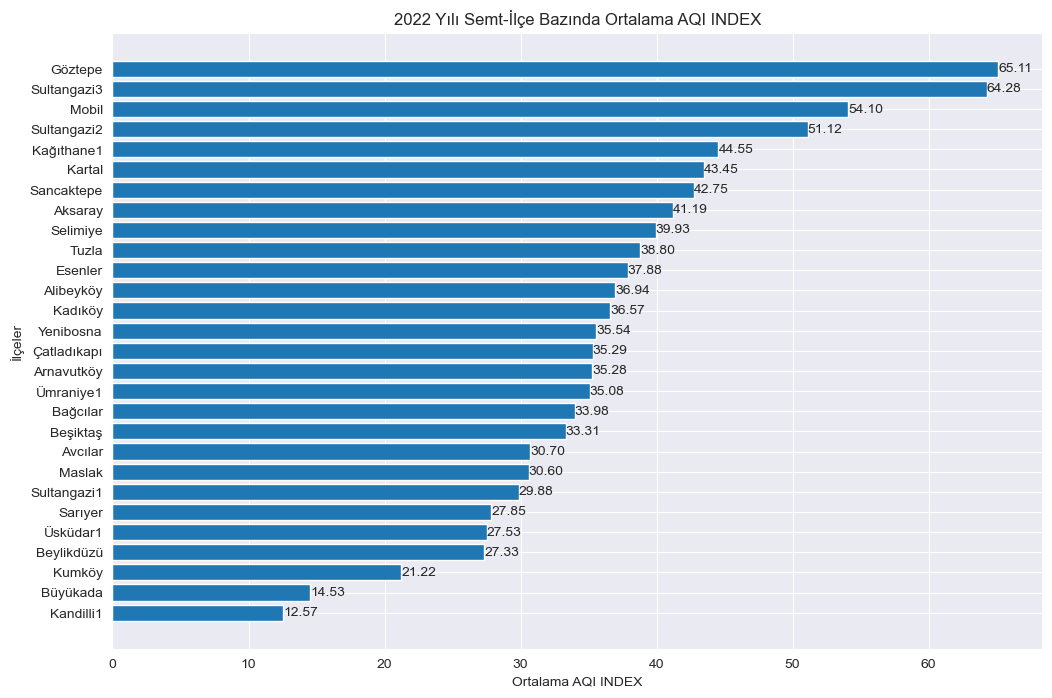

In [12]:
# İlçe adları ve sayısal değerler
ilceler = list(dfs.keys())
degerler = [ortalama_2022(df) for df in dfs.values()]

siralama = sorted(zip(degerler, ilceler), reverse=False)
degerler, ilceler = zip(*siralama)


# Çubuk genişliği
bar_width = 0.8

# Çubuk grafik çizimi
fig, ax = plt.subplots(figsize=(12, 8))
bars = ax.barh(ilceler, degerler, height=bar_width)

# Değerleri çubukların üzerine yazdırma
for bar in bars:
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height() / 2, f'{width:.2f}', ha='left', va='center')

# Eksen etiketleri ve başlık
ax.set_xlabel('Ortalama AQI INDEX')
ax.set_ylabel('İlçeler')
ax.set_title('2022 Yılı Semt-İlçe Bazında Ortalama AQI INDEX')

# Grafik gösterimi
plt.show()


In [13]:
def günici_hesap(df, zaman):
    """
    bu fonksiyon veri çerçevelerine eklenen gün içi zaman dilimlerine göre filtreleme yapıp ortalama çıkarmaya yarar
    """
    filtreli_veri = df[df['HourCategory'] == zaman]
    filtreli_ortalama = filtreli_veri['AQIINDEX_AQI'].mean()
    return filtreli_ortalama

In [14]:
def plot_mevsim_hesap(ax, df, name):
    filtreli_veri = df[df['Season'] == "Winter"]
    df_winter_mean = filtreli_veri['AQIINDEX_AQI'].mean()

    filtreli_veri = df[df['Season'] == "Spring"]
    df_spring_mean = filtreli_veri['AQIINDEX_AQI'].mean()

    filtreli_veri = df[df['Season'] == "Summer"]
    df_summer_mean = filtreli_veri['AQIINDEX_AQI'].mean()

    filtreli_veri = df[df['Season'] == "Autumn"]
    df_autumn_mean = filtreli_veri['AQIINDEX_AQI'].mean()

    bar_width = 0.5
    kategoriler = ["Kış", "İlkbahar", "Yaz", "Sonbahar"]
    renkler = ['#FFC107', '#03A9F4', '#4CAF50', '#FF5722']

    bars = ax.bar(kategoriler, [df_winter_mean, df_spring_mean, df_summer_mean, df_autumn_mean], width=bar_width,
                  color=renkler)

    #ax.set_xlabel('Mevsimler')
    #ax.set_ylabel('AQI INDEX Değerleri')
    ax.set_title(str(name) + ' AQI INDEX')

    for i, bar in enumerate(bars):
        x = bar.get_x() + bar.get_width() / 2
        y = bar.get_height()
        #ax.text(x, y, f'{y:.3f}', ha='center', va='bottom')
        ax.text(x, y, f'{y:.2f}', ha='center', va='top', rotation='vertical')




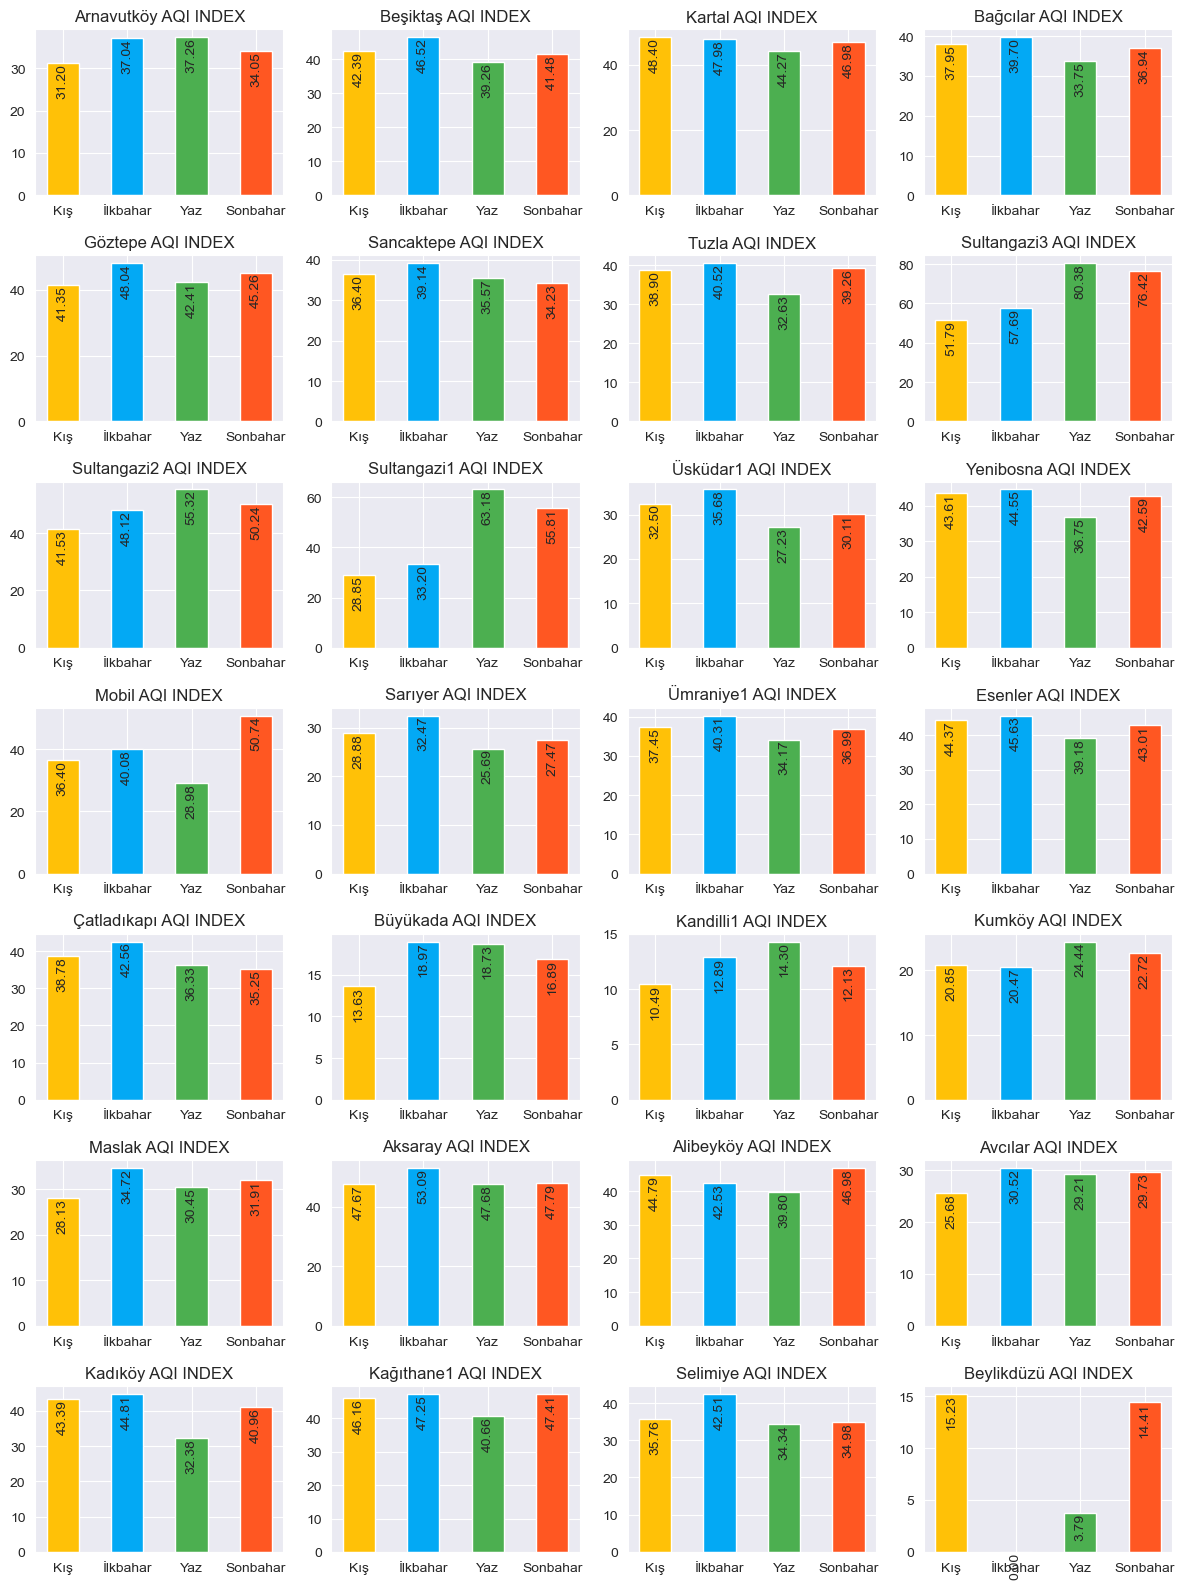

In [15]:
# Subplotlar için fig ve axs nesnelerini oluşturma
fig, axs = plt.subplots(7, 4, figsize=(12, 16))

# dfs sözlüğündeki her bir ilçe için grafik çizdirme döngüsü
for i, (district, df) in enumerate(dfs.items()):
    row = i // 4
    col = i % 4

    ax = axs[row, col] if len(dfs) > 1 else axs

    plot_mevsim_hesap(ax, df, district)

# Grafiklerin sıkışıklığını önlemek için düzenleme
plt.tight_layout()

# Grafiklerin gösterilmesi
plt.show()
#fig.savefig('Mevsimler.png')

In [16]:
def plot_günici_hesap(ax, df, name):
    filtreli_veri = df[df['HourCategory'] == "Day"]
    df_day_mean = filtreli_veri['AQIINDEX_AQI'].mean()

    filtreli_veri = df[df['HourCategory'] == "Evening"]
    df_evening_mean = filtreli_veri['AQIINDEX_AQI'].mean()

    filtreli_veri = df[df['HourCategory'] == "Night"]
    df_night_mean = filtreli_veri['AQIINDEX_AQI'].mean()

    bar_width = 0.3
    #kategoriler = ["Gündüz 08:00-16:00", "Akşam 16:00-00:00", "Gece 00:00-08:00"]
    kategoriler = ["Gündüz", "Akşam", "Gece"]
    renkler = ['#FF8C00', '#E6A8D7', '#00CED1']

    bars = ax.bar(kategoriler, [df_day_mean, df_evening_mean, df_night_mean], width=bar_width, color=renkler)

    #ax.set_xlabel('Zaman dilimleri')
    #ax.set_ylabel('AQI INDEX Değerleri')
    ax.set_title(str(name) + ' AQI INDEX')

    for i, bar in enumerate(bars):
        x = bar.get_x() + bar.get_width() / 2
        y = bar.get_height()
        #ax.text(x, y, f'{y:.3f}', ha='center', va='bottom')
        ax.text(x, y, f'{y:.2f}', ha='center', va='top', rotation='vertical')



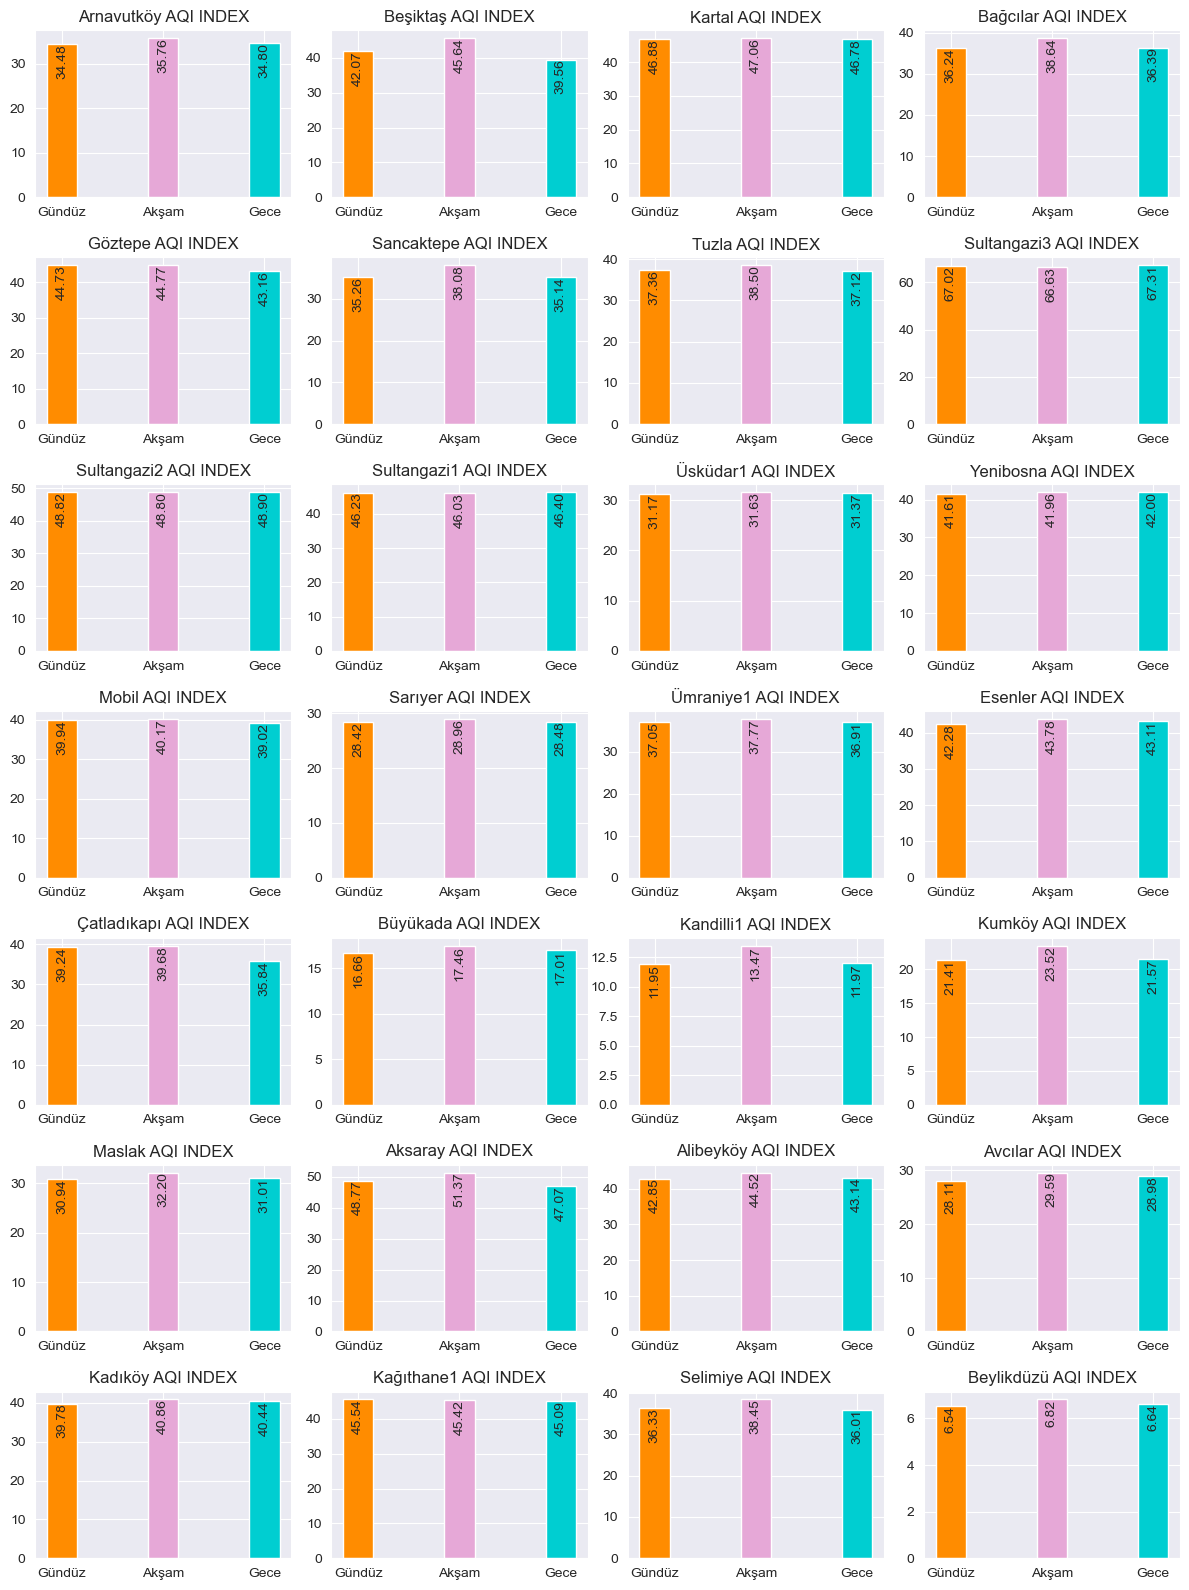

In [17]:
# Subplotlar için fig ve axs nesnelerini oluşturma
fig, axs = plt.subplots(7, 4, figsize=(12, 16))

# dfs sözlüğündeki her bir ilçe için grafik çizdirme döngüsü
for i, (district, df) in enumerate(dfs.items()):
    row = i // 4
    col = i % 4

    ax = axs[row, col] if len(dfs) > 1 else axs

    plot_günici_hesap(ax, df, district)

# Grafiklerin sıkışıklığını önlemek için düzenleme
plt.tight_layout()

# Grafiklerin gösterilmesi
plt.show()
#fig.savefig('Saatlik.png')